In [115]:
import pandas as pd
import numpy as np
from IPython.display import display, Math

In [165]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [166]:
df = pd.read_csv('Total Data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
import pandas as pd

# set date as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

### Missing Value

In [167]:
# select usual trading days:  rows with not null value from 'Gold Close' to 'Vix Close'
mask = df.loc[:, 'Gold Close':'VIX Close'].notna().any(axis=1)

# ffill data in usual trading days
df.loc[mask] = df.loc[mask].ffill()

### Feature Engineering

In [119]:
# Display the volatility formula in Markdown using LaTeX
display(Math(r'V_{S,t} = \ln(H_t) - \ln(L_t)'))

<IPython.core.display.Math object>

Reference: Alizadeh, Brandt and Diebold, 1999; Gallant, Hsu and Tauchen, 1999

In [168]:
# Function to calculate log difference volatility for a given asset
def calculate_log_volatility(df, asset_name):
    # Logarithmic difference volatility: ln(High) - ln(Low)
    df[f'log_vol_{asset_name.lower()}'] = np.log(df[f'{asset_name} High']) - np.log(df[f'{asset_name} Low'])

# List of assets to calculate volatilities for
assets = ['BTC', 'Gold', 'Spy', 'R', 'VIX']

# Loop through each asset and calculate the log volatility
for asset in assets:
    calculate_log_volatility(df, asset)

In [169]:
df.head(10)

,BTC High,BTC Low,BTC Close,BTC Volume,Gold Close,Gold High,Gold Low,Gold Volume,Spy Close,Spy High,...,R High,R Low,VIX High,VIX Low,VIX Close,log_vol_btc,log_vol_gold,log_vol_spy,log_vol_r,log_vol_vix
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,47415.73,46770.23,47173.45,3018.46827,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.013707,NaN,NaN,NaN,NaN
2022-01-02,47211.09,46750.00,47051.37,2838.97703,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.009815,NaN,NaN,NaN,NaN
2022-01-03,46600.21,45996.26,46550.00,5734.35172,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.013045,NaN,NaN,NaN,NaN
2022-01-04,46527.39,46246.01,46407.51,2185.03432,1817.0,1819.5,1800.6,10860.0,663.50,664.82,...,1.686,1.614,17.81,16.34,16.91,0.006066,0.010442,0.002591,0.043643,0.086144
2022-01-05,43275.80,42600.05,43245.25,7148.39091,1827.5,1832.6,1811.6,10320.0,659.30,663.65,...,1.712,1.640,20.17,16.58,19.73,0.015738,0.011525,0.008307,0.042966,0.195999
2022-01-06,41950.00,41000.00,41706.71,12822.50440,1791.5,1813.7,1788.0,33200.0,650.04,651.33,...,1.753,1.686,21.06,19.08,19.61,0.022906,0.014271,0.003846,0.038970,0.098735
2022-01-07,41999.99,41739.00,41913.58,2135.49013,1799.9,1800.7,1783.8,71890.0,655.03,663.90,...,1.801,1.711,20.80,18.57,18.76,0.006233,0.009430,0.015024,0.051264,0.113406
2022-01-08,42103.31,41681.17,41791.51,2460.77120,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.010077,NaN,NaN,NaN,NaN
2022-01-09,42248.50,41811.70,42042.38,3216.08520,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.010393,NaN,NaN,NaN,NaN


In [170]:
df.isna().sum() # do not fill the NAs below

BTC High          0
BTC Low           0
BTC Close         0
BTC Volume        0
Gold Close      303
Gold High       303
Gold Low        303
Gold Volume     303
Spy Close       303
Spy High        303
Spy Low         303
Spy Volume      303
R Close         303
R High          303
R Low           303
VIX High        303
VIX Low         303
VIX Close       303
log_vol_btc       0
log_vol_gold    303
log_vol_spy     303
log_vol_r       303
log_vol_vix     303
dtype: int64

In [123]:
all_trading_date = df.loc[mask, :]

In [171]:
all_trading_date.isna().sum() # the datset for EDA

BTC High                  0
BTC Low                   0
BTC Close                 0
BTC Volume                0
Gold Close                0
Gold High                 0
Gold Low                  0
Gold Volume               0
Spy Close                 0
Spy High                  0
Spy Low                   0
Spy Volume                0
R Close                   0
R High                    0
R Low                     0
VIX High                  0
VIX Low                   0
VIX Close                 0
log_vol_btc               0
log_vol_gold              0
log_vol_spy               0
log_vol_r                 0
log_vol_vix               0
7-day MA                  6
30-day MA                29
log_return_btc close      1
log_return_gold close     1
log_return_spy close      1
log_return_vix close      1
BTC Volatility            0
dtype: int64

In [172]:
all_trading_date.head()

,BTC High,BTC Low,BTC Close,BTC Volume,Gold Close,Gold High,Gold Low,Gold Volume,Spy Close,Spy High,...,log_vol_spy,log_vol_r,log_vol_vix,7-day MA,30-day MA,log_return_btc close,log_return_gold close,log_return_spy close,log_return_vix close,BTC Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,46527.39,46246.01,46407.51,2185.03432,1817.0,1819.5,1800.6,10860.0,663.50,664.82,...,0.002591,0.043643,0.086144,NaN,NaN,NaN,NaN,NaN,NaN,0.006066
2022-01-05,43275.80,42600.05,43245.25,7148.39091,1827.5,1832.6,1811.6,10320.0,659.30,663.65,...,0.008307,0.042966,0.195999,NaN,NaN,-0.070574,0.005762,-0.006350,0.154235,0.015738
2022-01-06,41950.00,41000.00,41706.71,12822.50440,1791.5,1813.7,1788.0,33200.0,650.04,651.33,...,0.003846,0.038970,0.098735,NaN,NaN,-0.036225,-0.019896,-0.014145,-0.006101,0.022906
2022-01-07,41999.99,41739.00,41913.58,2135.49013,1799.9,1800.7,1783.8,71890.0,655.03,663.90,...,0.015024,0.051264,0.113406,NaN,NaN,0.004948,0.004678,0.007647,-0.044313,0.006233
2022-01-10,42387.78,41971.37,42211.05,3883.13068,1801.3,1804.4,1792.0,39840.0,647.98,658.86,...,0.017392,0.032605,0.190153,NaN,NaN,0.007072,0.000778,-0.010821,0.033546,0.009872


In [173]:
print(all_trading_date.columns)

Index(['BTC High', 'BTC Low', 'BTC Close', 'BTC Volume', 'Gold Close',
       'Gold High', 'Gold Low', 'Gold Volume', 'Spy Close', 'Spy High',
       'Spy Low', 'Spy Volume', 'R Close', 'R High', 'R Low', 'VIX High',
       'VIX Low', 'VIX Close', 'log_vol_btc', 'log_vol_gold', 'log_vol_spy',
       'log_vol_r', 'log_vol_vix', '7-day MA', '30-day MA',
       'log_return_btc close', 'log_return_gold close', 'log_return_spy close',
       'log_return_vix close', 'BTC Volatility'],
      dtype='object')


In [174]:
all_trading_date.tail()

,BTC High,BTC Low,BTC Close,BTC Volume,Gold Close,Gold High,Gold Low,Gold Volume,Spy Close,Spy High,...,log_vol_spy,log_vol_r,log_vol_vix,7-day MA,30-day MA,log_return_btc close,log_return_gold close,log_return_spy close,log_return_vix close,BTC Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-23,64455.13,63400.00,63548.82,3443.68917,2610.7,2614.6,2585.0,174670.0,834.00,836.50,...,0.003665,0.016256,0.073427,60758.774286,59352.211667,0.000378,0.0,0.000120,-0.01623,0.016505
2024-09-24,63569.99,62900.00,63559.92,2295.13582,2610.7,2614.6,2585.0,174670.0,833.79,833.89,...,0.004676,0.016256,0.073427,61537.432857,59496.274000,0.000175,0.0,-0.000252,0.00000,0.010595
2024-09-25,64460.23,63645.49,63843.33,2493.73409,2610.7,2614.6,2585.0,174670.0,828.59,829.13,...,0.002294,0.016256,0.073427,62242.037143,59593.917667,0.004449,0.0,-0.006256,0.00000,0.012720
2024-09-26,63874.41,63340.00,63852.07,1978.65426,2610.7,2614.6,2585.0,174670.0,836.80,837.60,...,0.002008,0.016256,0.073427,62978.705714,59786.974333,0.000137,0.0,0.009860,0.00000,0.008402
2024-09-27,65550.00,65099.99,65460.02,3455.31320,2610.7,2614.6,2585.0,174670.0,833.09,833.22,...,0.002885,0.016256,0.073427,63697.564286,60020.408667,0.024871,0.0,-0.004443,0.00000,0.006889


In [175]:
# Display the structure of the DataFrame (columns) to help identify any potential issues with column names.
all_trading_date.columns

Index(['BTC High', 'BTC Low', 'BTC Close', 'BTC Volume', 'Gold Close',
       'Gold High', 'Gold Low', 'Gold Volume', 'Spy Close', 'Spy High',
       'Spy Low', 'Spy Volume', 'R Close', 'R High', 'R Low', 'VIX High',
       'VIX Low', 'VIX Close', 'log_vol_btc', 'log_vol_gold', 'log_vol_spy',
       'log_vol_r', 'log_vol_vix', '7-day MA', '30-day MA',
       'log_return_btc close', 'log_return_gold close', 'log_return_spy close',
       'log_return_vix close', 'BTC Volatility'],
      dtype='object')

In [176]:
all_trading_date

,BTC High,BTC Low,BTC Close,BTC Volume,Gold Close,Gold High,Gold Low,Gold Volume,Spy Close,Spy High,...,log_vol_spy,log_vol_r,log_vol_vix,7-day MA,30-day MA,log_return_btc close,log_return_gold close,log_return_spy close,log_return_vix close,BTC Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,46527.39,46246.01,46407.51,2185.03432,1817.0,1819.5,1800.6,10860.0,663.50,664.82,...,0.002591,0.043643,0.086144,NaN,NaN,NaN,NaN,NaN,NaN,0.006066
2022-01-05,43275.80,42600.05,43245.25,7148.39091,1827.5,1832.6,1811.6,10320.0,659.30,663.65,...,0.008307,0.042966,0.195999,NaN,NaN,-0.070574,0.005762,-0.006350,0.154235,0.015738
2022-01-06,41950.00,41000.00,41706.71,12822.50440,1791.5,1813.7,1788.0,33200.0,650.04,651.33,...,0.003846,0.038970,0.098735,NaN,NaN,-0.036225,-0.019896,-0.014145,-0.006101,0.022906
2022-01-07,41999.99,41739.00,41913.58,2135.49013,1799.9,1800.7,1783.8,71890.0,655.03,663.90,...,0.015024,0.051264,0.113406,NaN,NaN,0.004948,0.004678,0.007647,-0.044313,0.006233
2022-01-10,42387.78,41971.37,42211.05,3883.13068,1801.3,1804.4,1792.0,39840.0,647.98,658.86,...,0.017392,0.032605,0.190153,NaN,NaN,0.007072,0.000778,-0.010821,0.033546,0.009872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,64455.13,63400.00,63548.82,3443.68917,2610.7,2614.6,2585.0,174670.0,834.00,836.50,...,0.003665,0.016256,0.073427,60758.774286,59352.211667,0.000378,0.000000,0.000120,-0.016230,0.016505
2024-09-24,63569.99,62900.00,63559.92,2295.13582,2610.7,2614.6,2585.0,174670.0,833.79,833.89,...,0.004676,0.016256,0.073427,61537.432857,59496.274000,0.000175,0.000000,-0.000252,0.000000,0.010595
2024-09-25,64460.23,63645.49,63843.33,2493.73409,2610.7,2614.6,2585.0,174670.0,828.59,829.13,...,0.002294,0.016256,0.073427,62242.037143,59593.917667,0.004449,0.000000,-0.006256,0.000000,0.012720


In [177]:
df.to_csv('all_trading_date.csv', index = False)

In [178]:
from google.colab import files
files.download("all_trading_date.csv")

ModuleNotFoundError: No module named 'google.colab'

In [179]:
# Data preparation for EDA
df_eda = all_trading_date

# 1. Descriptive Statistics

Summarize the key statistics for the BTC Close price

### a. Calculate the mean, median, variance, and standard deviation for the BTC Close price

In [180]:
# Calculate the required statistics for the BTC Close price
mean_close = df_eda['BTC Close'].mean()
median_close = df_eda['BTC Close'].median()
variance_close = df_eda['BTC Close'].var()
std_deviation_close = df_eda['BTC Close'].std()

# Display the results
print(f"Mean (Close Price): {mean_close}")
print(f"Median (Close Price): {median_close}")
print(f"Variance (Close Price): {variance_close}")
print(f"Standard Deviation (Close Price): {std_deviation_close}")

Mean (Close Price): 37282.706771879486
Median (Close Price): 30411.22
Variance (Close Price): 272468982.16676956
Standard Deviation (Close Price): 16506.634489403634


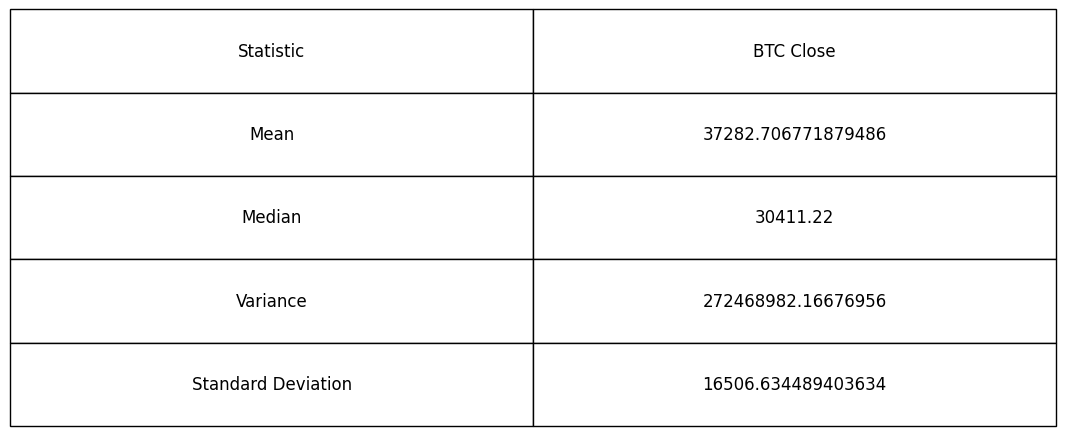

In [181]:
import matplotlib.pyplot as plt

# Data for the table
statistics_data = {
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation'],
    'BTC Close': [mean_close, median_close, variance_close, std_deviation_close]
}

# Create a DataFrame
statistics_df = pd.DataFrame(statistics_data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust figure size for slides

# Hide the axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=statistics_df.values, colLabels=statistics_df.columns, cellLoc='center', loc='center')

# Adjust the font size and spacing of the table
table.set_fontsize(14)
table.scale(1.5, 2.0)  # Adjust scaling for better spacing (increased)

# Add some padding for more spacing
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 2.5)  # Adjust scaling for better visibility

# Show the plot (table)
plt.show()


### Insight:
The close price of Bitcoin demonstrates substantial variability, with a mean around $37,282 and a high standard deviation of $16,506, indicating large price swings.

### b. Plot a Histogram for the BTC Close price to visualize the distribution

In [183]:
import plotly.graph_objs as go

# Create the histogram for Close price using Plotly
histogram = go.Histogram(
    x=df_eda['BTC Close'],
    nbinsx=30,
    marker=dict(color='lightblue', line=dict(color='black', width=1.2)),
    opacity=0.75
)

# Create layout
layout = go.Layout(
    title=dict(text='Histogram of Bitcoin Close Price', x=0.5, font=dict(size=20, color='#333')),
    xaxis=dict(title='Close Price (USD)'),
    yaxis=dict(title='Frequency'),
    width=700,
    height=500,
    template='plotly_white',
    bargap=0.1  # Space between bars
)

# Create the figure
fig = go.Figure(data=[histogram], layout=layout)

# Show the plot
fig.show()

### Insight:
The histogram shows multiple clusters, particularly around $20k, $30k, $40k, and $60k, reflecting distinct periods of market activity and possible price resistance or support levels at these ranges. This suggests that Bitcoin experiences frequent shifts between different price levels over time.

### c. BoxPlot of Bitcoin High, Low, and Close Prices

This boxplot visualizes the distribution of Bitcoin's High, Low, and Close prices, helping to detect outliers and understand the spread of price values over time.

In [184]:
import plotly.graph_objs as go

# Define the data for the Plotly BoxPlot using df_eda dataset
data = [
    go.Box(y=df_eda['BTC High'], name='BTC High', marker=dict(color='#4682B4'), boxmean=True),  # Steel Blue (darker light blue)
    go.Box(y=df_eda['BTC Low'], name='BTC Low', marker=dict(color='#1E90FF'), boxmean=True),    # Blue
    go.Box(y=df_eda['BTC Close'], name='BTC Close', marker=dict(color='#DAA520'), boxmean=True) # Goldenrod (Darker Gold)
]

# Create the layout for the plot
layout = go.Layout(
    title=dict(text='BoxPlot of Bitcoin High, Low, and Close Prices', x=0.5, font=dict(size=20, color='#333')),
    yaxis=dict(title='Price (USD)', gridcolor='#D3D3D3', zerolinecolor='#D3D3D3'),
    width=700,  # Adjust width for slides
    height=500,  # Adjust height for slides
    paper_bgcolor='white',  # White background
    plot_bgcolor='white',  # White plot area
    font=dict(color='#333'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    ),
    template='plotly_white'  # White theme
)

# Create the figure and show the plot
fig = go.Figure(data=data, layout=layout)
fig.show()

### Insight:
This box plot compares the distribution of Bitcoin's high, low, and close prices. The median values for each are distinct, with the high prices being the most spread out, indicating more variability compared to low and close prices. The narrow range of the low prices shows lower volatility on the downside, while the close prices maintain a balanced distribution, sitting between the highs and lows.


# 2. Time Series Analysis on Close Price & Log Return


Visualize the Close Price & Log Return trend over time


### a. Bitcoin Close Price with 7-day and 30-day Moving Averages

This graph visualizes Bitcoin's closing price over time, along with its 7-day and 30-day moving averages. The moving averages help smooth out short-term fluctuations and highlight longer-term trends, providing insight into price patterns and potential support or resistance levels.

In [185]:
# Step 1: Calculate 7-day and 30-day moving averages if not already done
df_eda['7-day MA'] = df_eda['BTC Close'].rolling(window=7).mean()
df_eda['30-day MA'] = df_eda['BTC Close'].rolling(window=30).mean()

# Step 2: Define the data for the Plotly plot using df_eda dataset
data = [
    go.Scatter(x=df_eda.index, y=df_eda['BTC Close'], mode='lines', name='BTC Close Price', 
               line=dict(color='#1E90FF', width=2), opacity=0.7),  # Light Blue
    go.Scatter(x=df_eda.index, y=df_eda['7-day MA'], mode='lines', name='7-day MA', 
               line=dict(color='#000000', width=2), opacity=0.8),  # Black
    go.Scatter(x=df_eda.index, y=df_eda['30-day MA'], mode='lines', name='30-day MA', 
               line=dict(color='#B8860B', width=2), opacity=0.8)  # Dark Gold
]

# Step 3: Create the layout for the plot
layout = go.Layout(
    title=dict(text='Bitcoin Close Price with 7-day and 30-day Moving Averages', x=0.5, font=dict(size=20, color='#333')),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price (USD)'),
    width=700,  # Adjust width for slides
    height=500,  # Adjust height for slides
    paper_bgcolor='white',  # White background
    plot_bgcolor='white',  # White plot area
    font=dict(color='#333'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    ),
    template='plotly_white'  # White theme
)

# Step 4: Create the figure and show the plot
fig = go.Figure(data=data, layout=layout)
fig.show()


### Insight:
This graph shows the Bitcoin closing price along with its 7-day and 30-day moving averages. The moving averages help smooth out the short-term fluctuations, clearly highlighting longer-term price trends. The 7-day moving average reacts faster to price changes, while the 30-day moving average is smoother and demonstrates the broader trend. This visualization can help identify potential support or resistance levels in Bitcoin's price behavior.

### b. Bitcoin Log Retrun Trend

We focus on analyzing the log returns of Bitcoin to observe its price trend over time. Log return is the natural logarithm of the ratio between the current day's closing price and the previous day's closing price. It is a widely used metric in financial analysis because it normalizes price changes, making it easier to interpret and analyze across different time periods.

By calculating and plotting Bitcoin's log return, we aim to visualize the daily fluctuations in price in a more consistent manner. The goal is to identify significant trends and understand how daily price changes evolve over time. Studying log returns helps in smoothing out large variances, giving a clearer picture of the asset's volatility and performance over the period from 2022 to 2024.

In [186]:
# Function to calculate log returns using last available close if previous day is missing
def calculate_log_return(df, asset_name):
    # Initialize a column of the last available close price
    df[f'last_available_{asset_name.lower()}'] = df[asset_name].fillna(method='ffill')  # Forward fill to track last available price, only for calculation
    # Calculate log returns
    df[f'log_return_{asset_name.lower()}'] = np.log(df[f'last_available_{asset_name.lower()}']) - np.log(df[f'last_available_{asset_name.lower()}'].shift(1))
    return df

# List of assets to calculate log returns for
assets = ['BTC Close', 'Gold Close', 'Spy Close', 'VIX Close']

# Loop through each asset and calculate the log returns
for asset in assets:
    df_eda = calculate_log_return(df_eda, asset)

# Drop the intermediate 'last_available_' columns
df_eda.drop([f'last_available_{asset.lower()}' for asset in assets], axis=1, inplace=True)

# Show the updated DataFrame
df_eda.head()

/var/folders/8y/fqf5d9yj56s5bxcc8q4t_80c0000gn/T/ipykernel_3876/1858607755.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/8y/fqf5d9yj56s5bxcc8q4t_80c0000gn/T/ipykernel_3876/1858607755.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/8y/fqf5d9yj56s5bxcc8q4t_80c0000gn/T/ipykernel_3876/1858607755.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/8y/fqf5d9yj56s5bxcc8q4t_80c0000gn/T/ipykernel_3876/1858607755.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,BTC High,BTC Low,BTC Close,BTC Volume,Gold Close,Gold High,Gold Low,Gold Volume,Spy Close,Spy High,...,log_vol_spy,log_vol_r,log_vol_vix,7-day MA,30-day MA,log_return_btc close,log_return_gold close,log_return_spy close,log_return_vix close,BTC Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,46527.39,46246.01,46407.51,2185.03432,1817.0,1819.5,1800.6,10860.0,663.50,664.82,...,0.002591,0.043643,0.086144,NaN,NaN,NaN,NaN,NaN,NaN,0.006066
2022-01-05,43275.80,42600.05,43245.25,7148.39091,1827.5,1832.6,1811.6,10320.0,659.30,663.65,...,0.008307,0.042966,0.195999,NaN,NaN,-0.070574,0.005762,-0.006350,0.154235,0.015738
2022-01-06,41950.00,41000.00,41706.71,12822.50440,1791.5,1813.7,1788.0,33200.0,650.04,651.33,...,0.003846,0.038970,0.098735,NaN,NaN,-0.036225,-0.019896,-0.014145,-0.006101,0.022906
2022-01-07,41999.99,41739.00,41913.58,2135.49013,1799.9,1800.7,1783.8,71890.0,655.03,663.90,...,0.015024,0.051264,0.113406,NaN,NaN,0.004948,0.004678,0.007647,-0.044313,0.006233
2022-01-10,42387.78,41971.37,42211.05,3883.13068,1801.3,1804.4,1792.0,39840.0,647.98,658.86,...,0.017392,0.032605,0.190153,NaN,NaN,0.007072,0.000778,-0.010821,0.033546,0.009872


In [187]:
# Step 1: Prepare the data for plotting
data = [
    go.Scatter(x=df_eda.index, y=df_eda['log_return_btc close'], mode='lines', 
               name='BTC Log Return', line=dict(color='#000000', width=2), opacity=0.7)  # Black
]

# Step 2: Create the layout for the plot
layout = go.Layout(
    title=dict(text='Bitcoin Log Return Trend (2022-2024)', x=0.5, font=dict(size=20, color='#333')),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Log Return'),
    width=700,  # Adjust width for slides
    height=500,  # Adjust height for slides
    paper_bgcolor='white',  # White background
    plot_bgcolor='white',  # White plot area
    font=dict(color='#333'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    ),
    template='plotly_white'  # White theme
)

# Step 3: Create the figure and show the plot
fig = go.Figure(data=data, layout=layout)
fig.show()

### Insight:
The Bitcoin Log Return Trend plot from 2022 to 2024 shows fluctuations in Bitcoin’s daily log returns over time. The values hover mostly around zero, indicating days with minimal returns. However, there are noticeable spikes and dips, reflecting days with significant gains or losses. These sudden changes highlight periods of high volatility, showing how quickly Bitcoin's market can experience shifts. The trend reflects both consistent smaller movements and occasional large deviations, suggesting a market that is typically stable but prone to abrupt changes in return.

# 3. Volatility Analysis


Understand the asset’s volatility over time


### a. Bitcoin Volatility (In(High) - In(Low)) with 7-day and 30-day Moving Averages

This graph demonstrates the daily volatility of Bitcoin prices, defined as the natural logarithm of the difference between the daily high and low prices, along with 7-day and 30-day moving averages. This analysis aims to capture short-term and long-term trends in Bitcoin's price fluctuations.

In [188]:
# Define the traces for daily volatility and moving averages using df_eda dataset
trace_daily = go.Scatter(x=df_eda.index, y=df_eda['log_vol_btc'], mode='lines', name='Daily Volatility', line=dict(color='#ADD8E6', width=2))  # Light blue
trace_ma7 = go.Scatter(x=df_eda.index, y=df_eda['log_vol_btc'].rolling(window=7).mean(), mode='lines', name='7-day MA Volatility', line=dict(color='#00008B', width=2))  # Dark blue
trace_ma30 = go.Scatter(x=df_eda.index, y=df_eda['log_vol_btc'].rolling(window=30).mean(), mode='lines', name='30-day MA Volatility', line=dict(color='#FFD700', width=2))  # Gold

# Define the layout for the plot
layout = go.Layout(
    title=dict(text='BTC Volatility (ln(High) - ln(Low)) with 7-day and 30-day Moving Averages', x=0.5, font=dict(size=18, color='#333')),
    xaxis=dict(title='Date', showgrid=True, gridcolor='#D3D3D3'),
    yaxis=dict(title='Volatility (ln(High) - ln(Low))', showgrid=True, gridcolor='#D3D3D3'),
    width=800,  # Adjust width for slides
    height=500,  # Adjust height for slides
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='#333'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    )
)

# Create the figure and show the plot
fig = go.Figure(data=[trace_daily, trace_ma7, trace_ma30], layout=layout)
fig.show()

### Insight:
This graph shows the daily volatility of Bitcoin, defined as the log difference between high and low prices (ln(High) - ln(Low)), alongside its 7-day and 30-day moving averages. The moving averages help smooth out short-term fluctuations, revealing periods of relatively high or low volatility over time.

### b. Calculate and Plot Weekly Volatility

This part calculates the weekly volatility of Bitcoin using the logarithmic difference between the weekly high and low prices (ln(High)−ln(Low)). We aggregate the daily data to weekly and visualize the volatility trend.

In [189]:
# Resample based on the index (assuming it's a datetime index)
df_weekly = df_eda.resample('W').agg({'BTC High': 'max', 'BTC Low': 'min'})

# Calculate weekly volatility using ln(High) - ln(Low)
df_weekly['Weekly Volatility'] = np.log(df_weekly['BTC High']) - np.log(df_weekly['BTC Low'])

# Define the data for the Plotly line plot
data = go.Scatter(
    x=df_weekly.index, 
    y=df_weekly['Weekly Volatility'], 
    mode='lines', 
    name='Weekly Volatility',
    line=dict(color='#FFD700', width=3)  # Using light gold for the line
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
        text='Weekly Volatility of Bitcoin',
        x=0.5,
        font=dict(size=20, color='#333')
    ),
    xaxis=dict(
        title='Date',
        gridcolor='#D3D3D3',
        zerolinecolor='#D3D3D3'
    ),
    yaxis=dict(
        title='Volatility (ln(High) - ln(Low))',
        gridcolor='#D3D3D3',
        zerolinecolor='#D3D3D3'
    ),
    width=700,
    height=500,
    paper_bgcolor='white',  # White background
    plot_bgcolor='white',   # White plot area
    font=dict(color='#333'),
    template='plotly_white'
)

# Create the figure and show the plot
fig = go.Figure(data=[data], layout=layout)
fig.show()

### Insight:
The weekly volatility graph shows fluctuations in Bitcoin’s price volatility over time, calculated as the logarithmic difference between the weekly highs and lows. There are notable spikes in volatility, particularly around early 2023 and mid-2024, indicating periods of heightened price instability. These periods could potentially be linked to significant market events or shifts in investor sentiment. The overall trend suggests alternating periods of calm and high volatility.

### c. Investigate Patterns During High-Volatility Periods

In this part, we will identify the periods of high volatility by focusing on the top 10% of the weekly volatility values. Once these high-volatility periods are identified, we will investigate any observable patterns or significant events during those periods. By analyzing the market behavior during these spikes, we can draw insights into the factors that may drive such volatility.

In [190]:
# Define high-volatility threshold (top 10% of volatility values)
volatility_threshold = df_weekly['Weekly Volatility'].quantile(0.90)

# Filter the data to show only the high-volatility periods
high_volatility_periods = df_weekly[df_weekly['Weekly Volatility'] > volatility_threshold]

# Display the high-volatility periods
print(high_volatility_periods)

# Plotting the high-volatility periods for further insights
import plotly.graph_objs as go

# Create the plot for high-volatility periods
trace_high_vol = go.Scatter(
    x=high_volatility_periods.index,
    y=high_volatility_periods['Weekly Volatility'],
    mode='lines+markers',
    name='High Volatility',
    line=dict(color='gold', width=2),
    marker=dict(size=8)
)

layout = go.Layout(
    title=dict(text='High Volatility Periods of Bitcoin', x=0.5, font=dict(size=20)),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Volatility (ln(High) - ln(Low))'),
    width=900,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='#333'),
    template='plotly_white'
)

fig = go.Figure(data=[trace_high_vol], layout=layout)
fig.show()

            BTC High   BTC Low  Weekly Volatility
Date                                             
2022-01-23  42337.30  35112.84           0.187102
2022-02-27  39468.73  34322.28           0.139714
2022-03-06  44534.79  38407.59           0.148016
2022-05-15  33838.42  26700.00           0.236933
2022-06-19  23362.88  20326.00           0.139248
2022-07-10  22242.29  19082.92           0.153202
2022-07-31  24442.66  21017.21           0.150988
2022-08-21  24982.70  21447.76           0.152563
2022-09-18  22627.00  19728.00           0.137105
2022-11-13  20242.40  16204.36           0.222499
2023-01-15  21033.64  17189.15           0.201845
2023-03-19  26196.40  22222.88           0.164500
2023-06-25  30350.00  26369.00           0.140607
2024-07-07  63466.92  53485.93           0.171100
2024-08-11  61390.70  49000.00           0.225438


### Insight:
The high-volatility periods for Bitcoin show that volatility spikes are distributed unevenly over time, with significant peaks around early 2022, late 2022, and mid-2024. These spikes likely correspond to major market events or external factors influencing the cryptocurrency market (we are going to explore and answer later), indicating that certain periods experienced sharp fluctuations in Bitcoin's price.

# 4. Correlation Analysis


Examine relationships between price points and volatility

### a. Correlation Matrix of Bitcoin Close Price vs Other Indices

This heatmap displays the correlation between Bitcoin's close price and the close prices of other major financial indices. It provides a visual understanding of how Bitcoin's price movements relate to other assets, offering insights into asset co-movements and diversification opportunities.

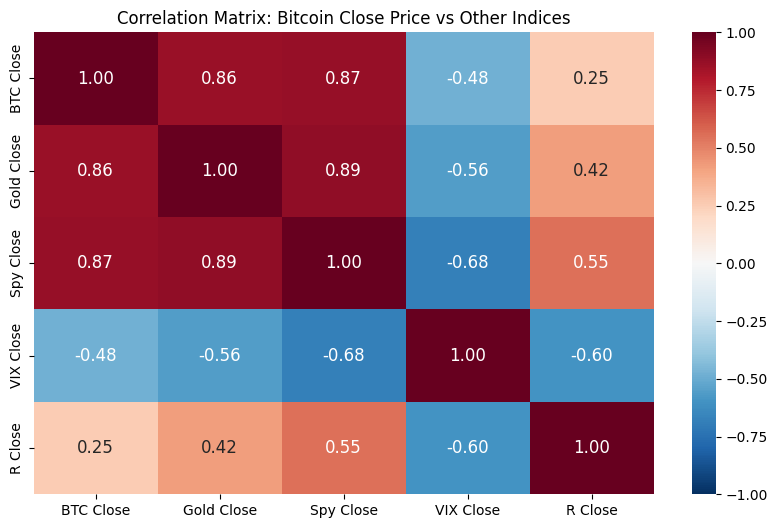

In [143]:
import seaborn as sns

# Step 1: Compute the correlation matrix for Close Prices
df_close_corr = df_eda[['BTC Close', 'Gold Close', 'Spy Close', 'VIX Close', 'R Close']].corr()

# Step 2: Round the correlation values to 2 decimal places for better readability
df_close_corr = df_close_corr.round(2)

# Step 3: Plot the correlation matrix with the desired color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(df_close_corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, center=0, annot_kws={"size": 12}, fmt='.2f')
plt.title('Correlation Matrix: Bitcoin Close Price vs Other Indices')
plt.show()

### Insight:
The correlation matrix indicates that Bitcoin's closing price has a strong positive correlation with Gold (0.86) and the S&P 500 (0.87), suggesting that Bitcoin's price tends to move in a similar direction as these traditional assets. There is a significant negative correlation between Bitcoin and the VIX index (-0.48), implying that during periods of high market volatility (VIX), Bitcoin's price tends to decrease. Lastly, Bitcoin's correlation with the U.S. 10-year bond yield (R Close) is moderately positive at 0.25, showing a weaker relationship compared to the other indices.

### b. Correlation Matrix of Bitcoin Volatility vs Other Indices' Volatility

This heatmap illustrates the correlations between Bitcoin’s volatility and the volatility of other financial indices. It helps in identifying how Bitcoin's volatility interacts with the volatility patterns of other markets, which can aid in risk management and portfolio construction.

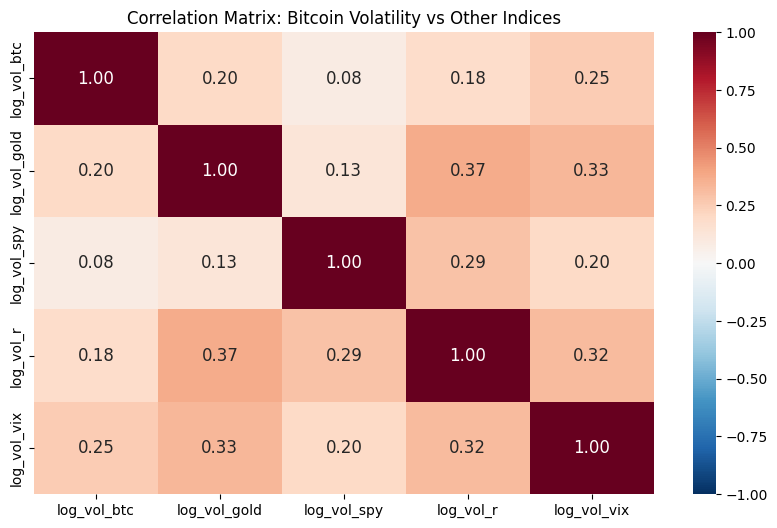

In [192]:
# Step 1: Compute the correlation matrix for Volatility
df_vol_corr = df_eda[['log_vol_btc', 'log_vol_gold', 'log_vol_spy', 'log_vol_r', 'log_vol_vix']].corr()

# Step 2: Round the correlation values to 2 decimal places for better readability
df_vol_corr = df_vol_corr.round(2)

# Step 3: Plot the correlation matrix with the desired color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(df_vol_corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, center=0, annot_kws={"size": 12}, fmt='.2f')
plt.title('Correlation Matrix: Bitcoin Volatility vs Other Indices')
plt.show()

### Insight:
The correlation matrix for Bitcoin volatility against other indices' volatilities shows relatively low correlations across the board, with the highest correlation between Bitcoin volatility and VIX volatility (0.25). This suggests that while Bitcoin and other indices may experience periods of volatility, their volatility movements are generally not strongly related. This analysis provides useful information for risk management and diversification.

### c. Lagged Effect Analysis: PACF for Bitcoin Volatility, Closing Price, and Log Return

In this analysis, we explore the lagged effects of Bitcoin's volatility (ln(high)-ln(low)) and closing price on their future values. Specifically, we want to determine how much influence past values (up to 30 days) have on current values.

We use the Partial Autocorrelation Function (PACF), which shows the correlation between a time series and its lagged values, excluding the effects of intermediate lags. PACF is useful for identifying which lag(s) have the most direct and significant impact on future values. By plotting PACF, we can visualize how far back into the past the values remain relevant to the current state.

This analysis includes two separate PACF plots:

1. Bitcoin Volatility (ln difference between High and Low prices) to assess how past volatilities influence future volatilities.
2. Bitcoin Closing Price to evaluate the lag effect of past closing prices on future prices.
3. Bitcoin Log Return to assess the lag effect of past log return on future returns.

By visualizing PACF with lags ranging from 0 to 30 days, we can identify which lags are statistically significant, helping us determine how far into the past we need to look when analyzing Bitcoin’s volatility and price movements.

1. PACF: BTC Volatility

<Figure size 1000x600 with 0 Axes>

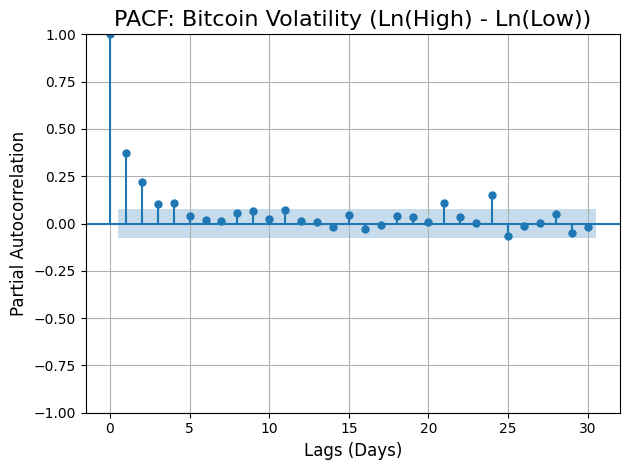

In [193]:
from statsmodels.graphics.tsaplots import plot_pacf

# Step 1: Calculate volatility (ln(High) - ln(Low))
df_eda['BTC Volatility'] = np.log(df_eda['BTC High']) - np.log(df_eda['BTC Low'])

# Step 2: Plot PACF for Bitcoin Volatility
plt.figure(figsize=(10, 6))
plot_pacf(df_eda['BTC Volatility'].dropna(), lags=30, method='ywm')
plt.title('PACF: Bitcoin Volatility (Ln(High) - Ln(Low))', fontsize=16)
plt.xlabel('Lags (Days)', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.grid(True)

# Customize plot aesthetics based on your style guide
plt.tight_layout()
plt.show()

### Insight:
Significant Lag Effects: There is a notable spike at lag 1, indicating that the previous day's volatility has a relatively strong direct influence on the current day's volatility. This suggests a short-term correlation in Bitcoin’s volatility behavior. Lags that are statisitcally significant (outside the confidence interval) include n = 1, 2, 3, 4, 21, 24.

Diminishing Impact: As the lag increases, the partial autocorrelations generally decrease and fluctuate around zero, meaning that after a few days, the direct influence of past volatilities on the current day diminishes significantly.

2. PACF: BTC Close Price

<Figure size 1000x600 with 0 Axes>

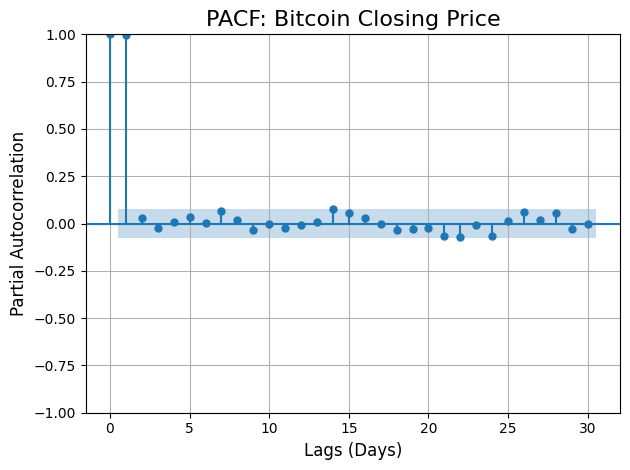

In [194]:
# Plot PACF for Bitcoin Closing Price
plt.figure(figsize=(10, 6))
plot_pacf(df_eda['BTC Close'].dropna(), lags=30, method='ywm')
plt.title('PACF: Bitcoin Closing Price', fontsize=16)
plt.xlabel('Lags (Days)', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.grid(True)

# Customize plot aesthetics based on your style guide
plt.tight_layout()
plt.show()

### Insight:

The PACF plot for Bitcoin's closing price shows a strong short-term correlation, particularly (and only) at lag 1, indicating that the previous day's price heavily influences the current price. Beyond n = 1, the correlations diminish quickly, suggesting no significant long-term effects.

3. PACF: BTC Log Return

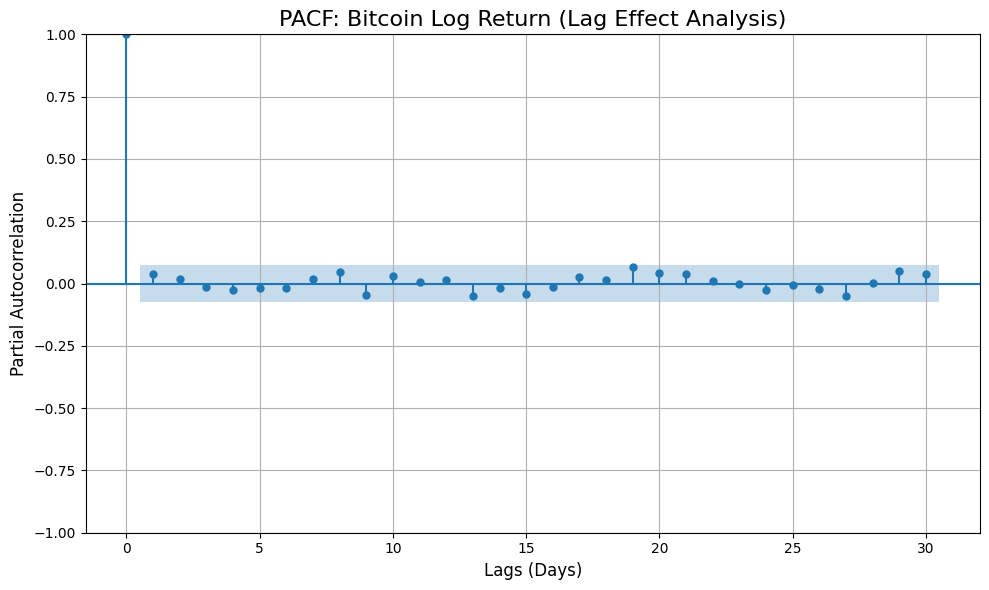

In [197]:
# Step 1: Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Step 2: Plot PACF for Bitcoin Log Return
plot_pacf(df_eda['log_return_btc close'].dropna(), lags=30, method='yw', ax=ax)

# Step 3: Customize plot aesthetics based on your style guide
ax.set_title('PACF: Bitcoin Log Return (Lag Effect Analysis)', fontsize=16)
ax.set_xlabel('Lags (Days)', fontsize=12)
ax.set_ylabel('Partial Autocorrelation', fontsize=12)
ax.grid(True)

# Step 4: Show the plot
plt.tight_layout()
plt.show()

### Insight:
The PACF (Partial Autocorrelation Function) analysis for Bitcoin's log return shows that all points except for lag 0 fall within the confidence interval, indicating that they are statistically non-significant. This suggests that past log returns do not have a significant direct impact on current log returns beyond the immediate correlation with the present value (lag 0). Therefore, the previous days' log returns do not exhibit any meaningful lag effect on the current day's log return in this analysis.

# 5. Research Question

When are the periods of highest volatility? Are there specific events corresponding to these periods?

1. In February 2022, Belgium introduced new regulations for virtual asset service providers, which included stricter anti-money laundering (AML) and professional integrity requirements, effective in May 2022.

2.  FTX, one of the largest cryptocurrency exchanges globally, filed for bankruptcy on November 11, 2022. The collapse of FTX, a key player in the crypto ecosystem, sent shockwaves throughout the entire cryptocurrency market. 